In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyulog import ULog
import utm  # For converting local x, y to latitude and longitude

from pyproj import Proj, transform

In [13]:
def extract_speed_and_location(ulog, dataset_name, output_csv):
    """
    Extract and plot speed and location data from ULog.

    :param ulog: ULog object
    :param dataset_name: Name of the dataset to extract
    :param output_csv: Path to save the extracted CSV file
    """
    # Extract the dataset
    dataset = ulog.get_dataset(dataset_name)
    data = dataset.data

    # Extract required fields
    timestamps = data['timestamp']
    vx = data['vx']
    vy = data['vy']
    vz = data['vz']
    x = data['x']
    y = data['y']
    z = data['z']
    ref_lat = data['ref_lat'][0]  # Static reference latitude
    ref_lon = data['ref_lon'][0]  # Static reference longitude
    ref_alt = data['ref_alt'][0]  # Static reference altitude

    # Initialize geographic transformation
    proj_utm = Proj(proj="utm", zone=33, ellps="WGS84")  # Replace zone if necessary
    proj_wgs84 = Proj(proj="latlong", datum="WGS84")

    # Calculate speed and geographic location
    speed = np.sqrt(vx**2 + vy**2 + vz**2)
    latitude = []
    longitude = []
    altitude = []

    for xi, yi, zi in zip(x, y, z):
        # Convert from local UTM to WGS84
        print(f"xi: {xi}, yi: {yi}, ref_lat: {ref_lat}, ref_lon: {ref_lon}")
        utm_x = xi + ref_lon
        utm_y = yi + ref_lat
        lon, lat = transform(proj_utm, proj_wgs84, utm_x, utm_y)
        latitude.append(lat)
        longitude.append(lon)
        altitude.append(ref_alt + zi)

    # Save to a DataFrame
    df = pd.DataFrame({
        'Timestamp': timestamps,
        'Latitude': latitude,
        'Longitude': longitude,
        'Altitude': altitude,
        'Speed': speed,
    })

    # Save to CSV
    df.to_csv(output_csv, index=False)
    print(f"Data saved to {output_csv}")

    return df

In [14]:
def plot_speed_and_location(df):
    """
    Plot speed over time and the trajectory on a 2D map.

    :param df: DataFrame containing the extracted data
    """
    # Plot speed over time
    plt.figure(figsize=(10, 6))
    plt.plot(df['Timestamp'], df['Speed'], label='Speed', color='blue')
    plt.xlabel('Timestamp [ms]')
    plt.ylabel('Speed [m/s]')
    plt.title('Speed Over Time')
    plt.grid()
    plt.legend()
    plt.show()

    # Plot trajectory
    plt.figure(figsize=(10, 6))
    plt.plot(df['Longitude'], df['Latitude'], label='Trajectory', color='green', marker='o')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('2D Trajectory')
    plt.grid()
    plt.legend()
    plt.show()

In [15]:
def main():
    from pyulog import ULog

    ulog_path = "/home/hawk/GitDir/Logging/2024-12-09/12_40_59.ulg" # Replace with your .ulg file path
    dataset_name = "vehicle_local_position"  # Dataset containing the required fields
    output_csv = "csv_files/trajectory_speed_location_data.csv"

    # Load ULog file
    ulog = ULog(ulog_path)

    # Extract data and save to CSV
    df = extract_speed_and_location(ulog, dataset_name, output_csv)

    # Plot the results
    plot_speed_and_location(df)

xi: -0.3561001718044281, yi: -0.10850569605827332, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3571006953716278, yi: -0.10852967202663422, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.35807889699935913, yi: -0.1085447445511818, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3590352535247803, yi: -0.10855118930339813, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.35997024178504944, yi: -0.1085493192076683, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3608843982219696, yi: -0.10853936523199081, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3617781400680542, yi: -0.10852153599262238, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.36214518547058105, yi: -0.10876282304525375, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3625282049179077, yi: -0.10898755490779877, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3629031479358673, yi: -0.1092

/tmp/ipykernel_71980/1266496943.py:40: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(proj_utm, proj_wgs84, utm_x, utm_y)


xi: -0.35476118326187134, yi: -0.10545501857995987, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3551337718963623, yi: -0.10573305934667587, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3555036187171936, yi: -0.10600364208221436, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.35587078332901, yi: -0.10626700520515442, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3562353551387787, yi: -0.10652338713407516, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3565794825553894, yi: -0.10678406059741974, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.35692161321640015, yi: -0.10703817009925842, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3572617769241333, yi: -0.10728589445352554, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3575999438762665, yi: -0.1075274795293808, ref_lat: 47.397974329899256, ref_lon: 8.546165184067178
xi: -0.3579363226890564, yi: -0.107763

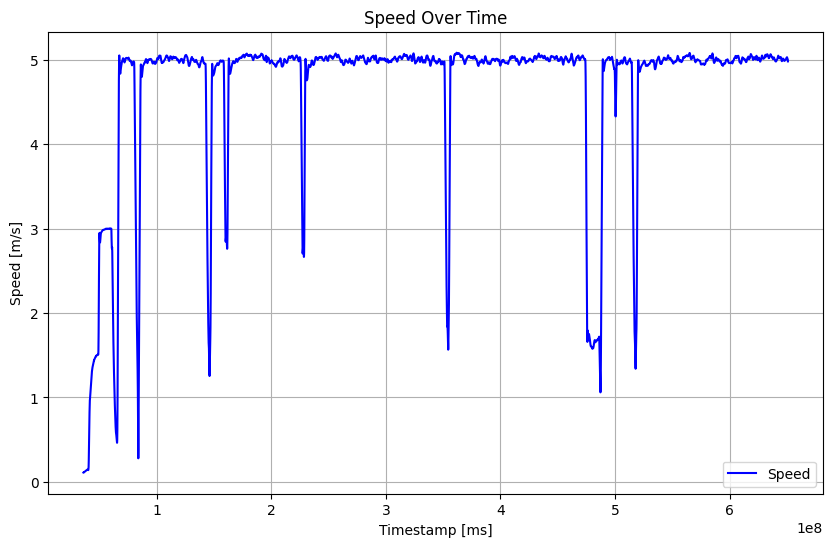

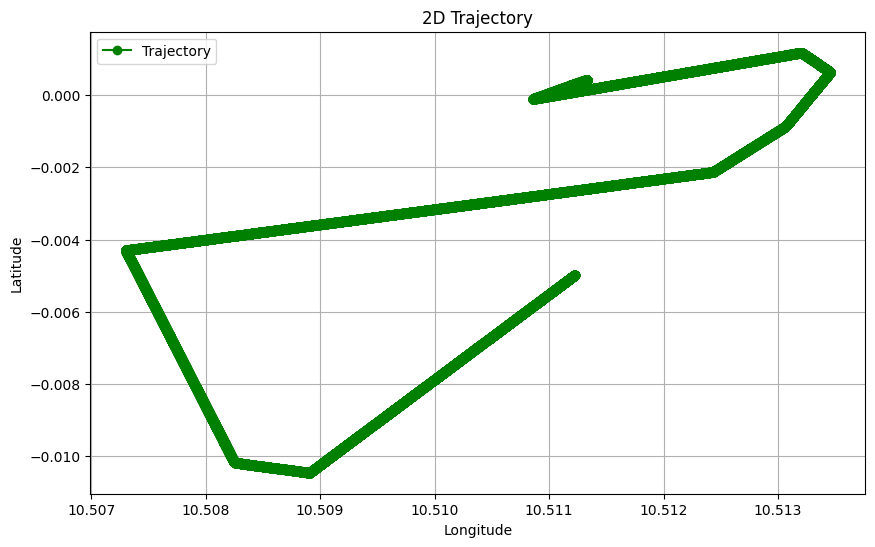

In [16]:
if __name__ == "__main__":
    main()